In [37]:
import pandas as pd
import numpy as numpy 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
data= 'salarydatasvm.csv'
df = pd.read_csv(data)

# EDA

In [39]:
df.shape

(15060, 14)

In [40]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [41]:
col_names= df.columns
col_names

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [42]:
df['Salary'].value_counts()

Salary
 <=50K    11360
 >50K      3700
Name: count, dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [44]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [45]:
round(df.describe(),2)

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.00,15060.00,15060.00,15060.00,15060.00
mean,38.77,10.11,1120.30,89.04,40.95
std,13.38,2.56,7703.18,406.28,12.06
min,17.00,1.00,0.00,0.00,1.00
25%,28.00,9.00,0.00,0.00,40.00
50%,37.00,10.00,0.00,0.00,40.00
75%,48.00,13.00,0.00,0.00,45.00
max,90.00,16.00,99999.00,3770.00,99.00


# Checking the outliers

<Axes: >

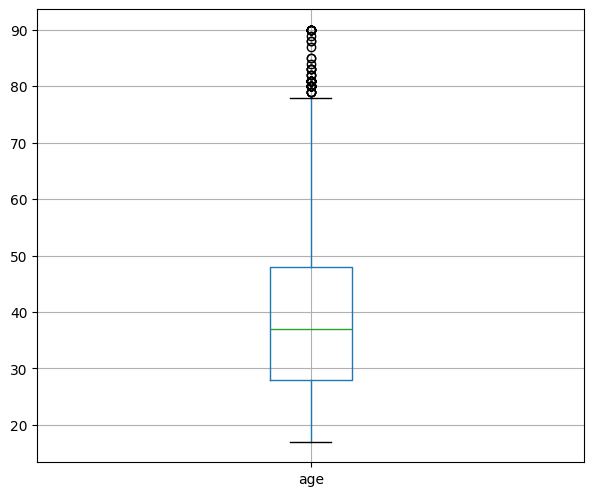

In [46]:
plt.figure(figsize=(24,20))

plt.subplot(3,3,3)
df.boxplot(column='age')




<Axes: >

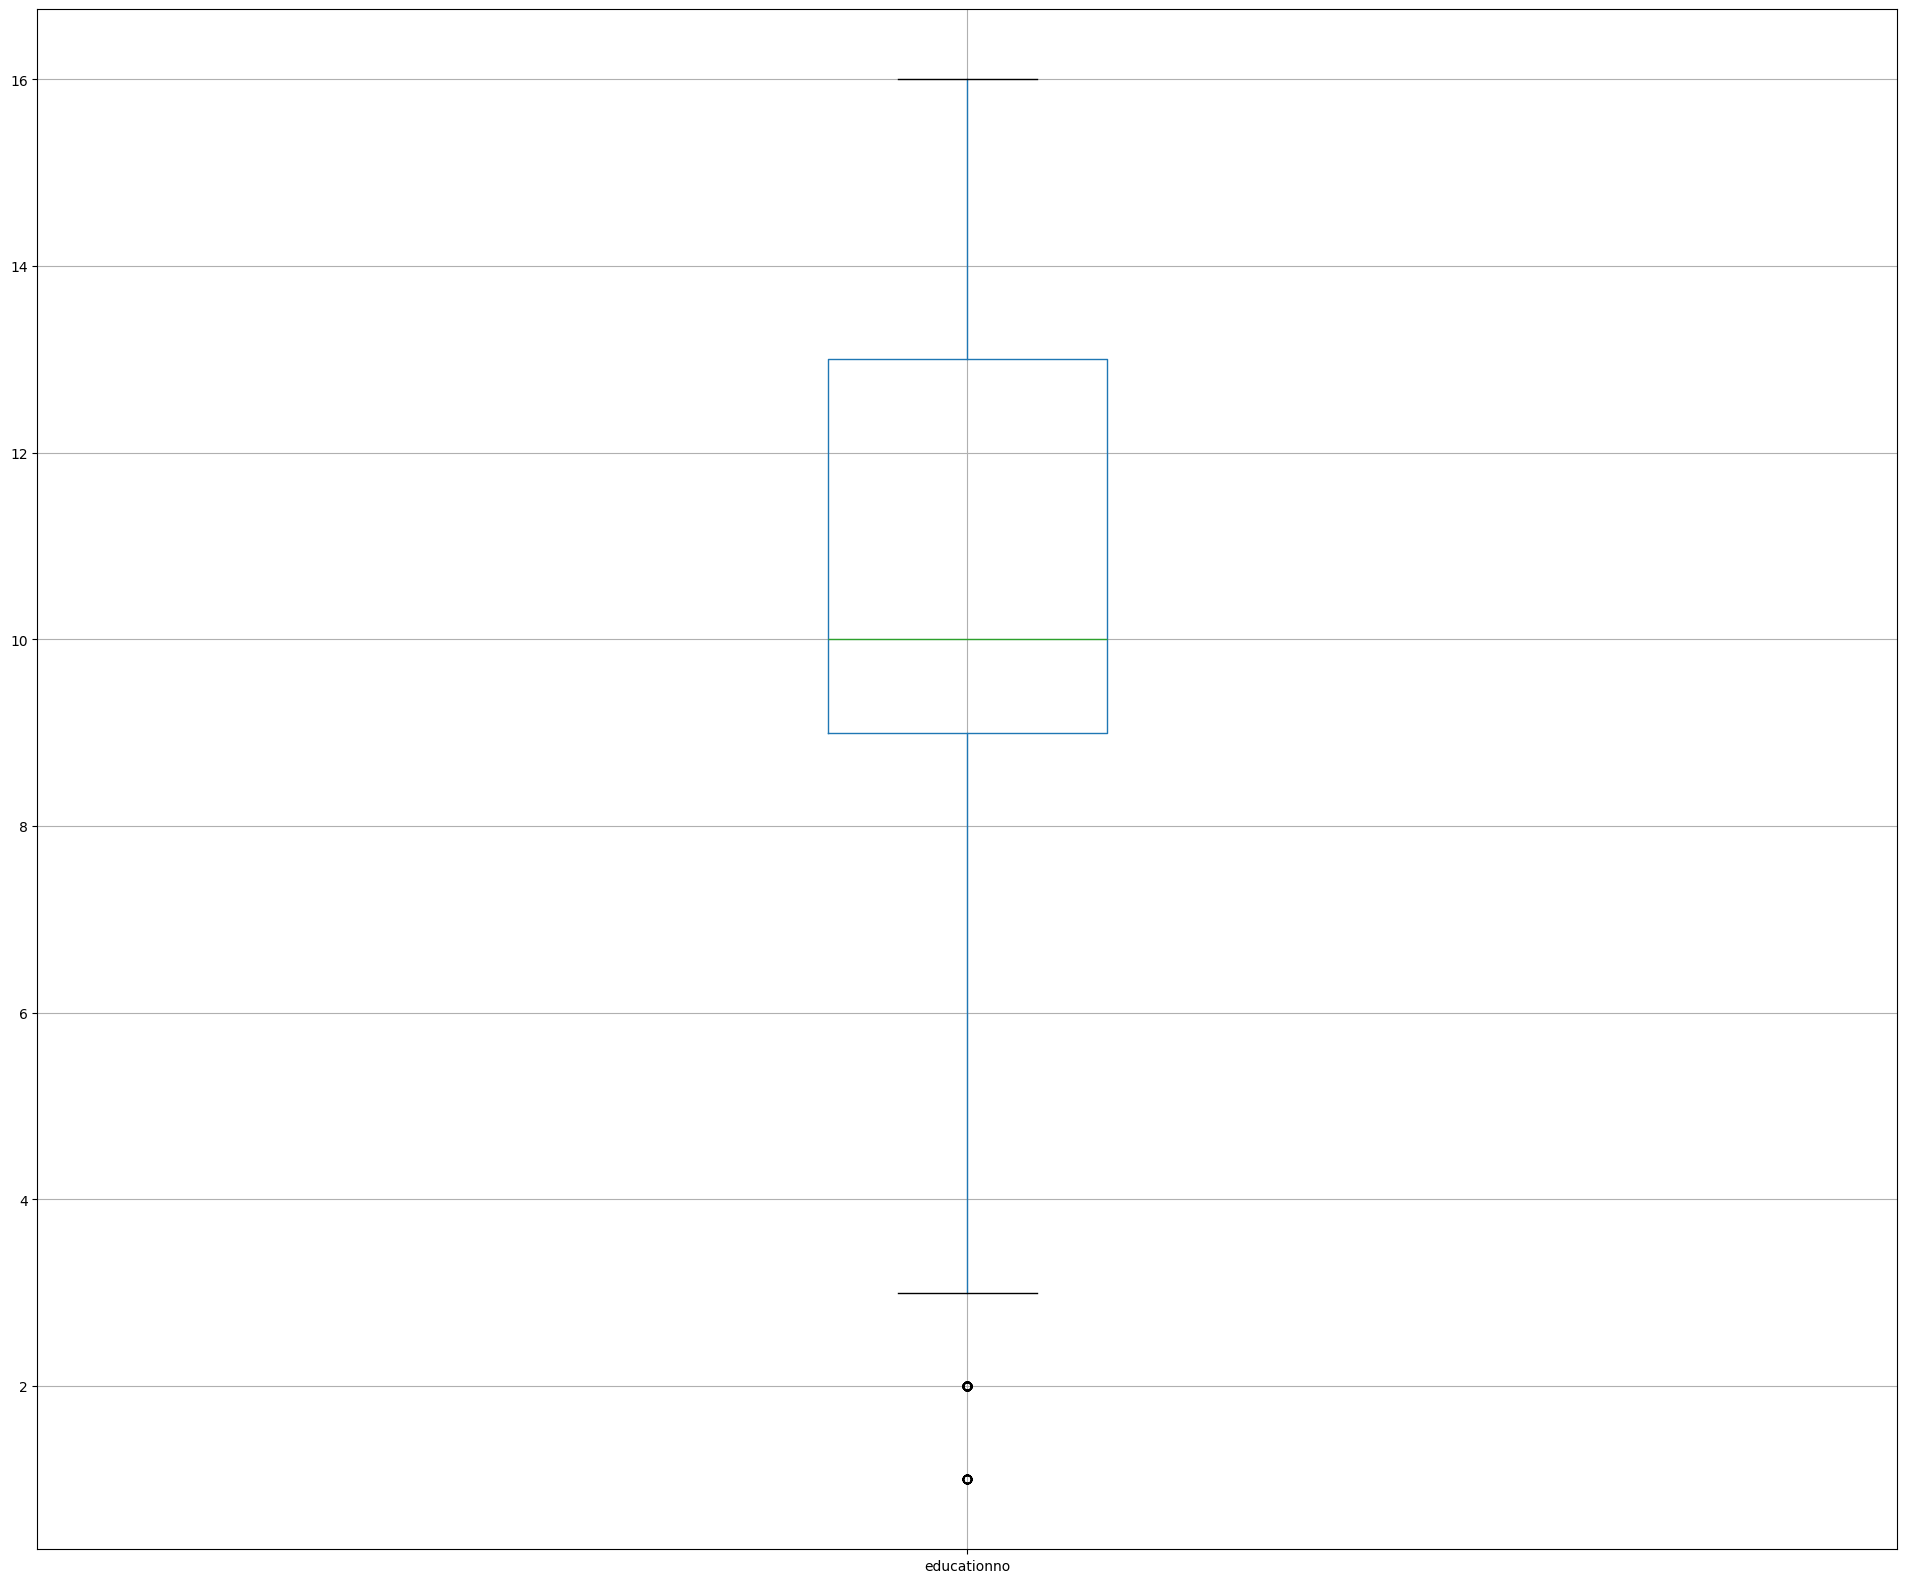

In [47]:
 plt.figure(figsize=(24,20))
df.boxplot(column='educationno')



<Axes: >

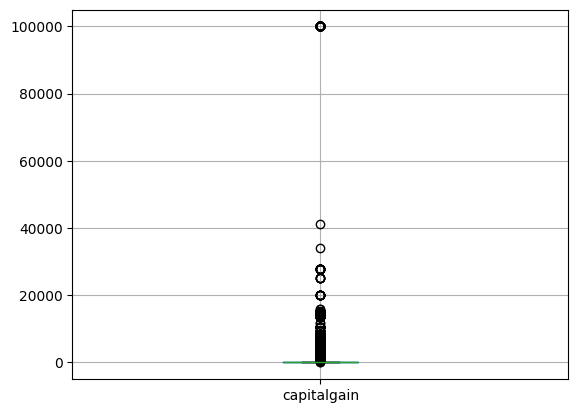

In [48]:
df.boxplot(column='capitalgain')

<Axes: >

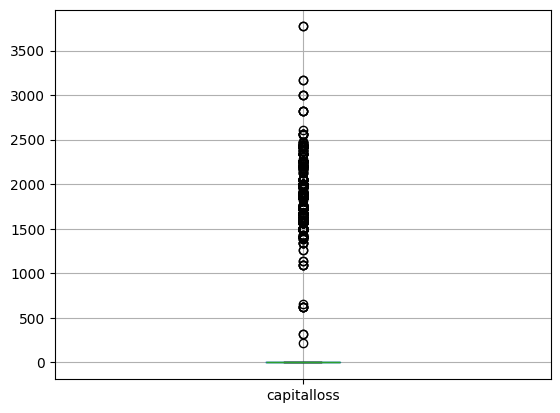

In [49]:
df.boxplot(column= 'capitalloss')

<Axes: >

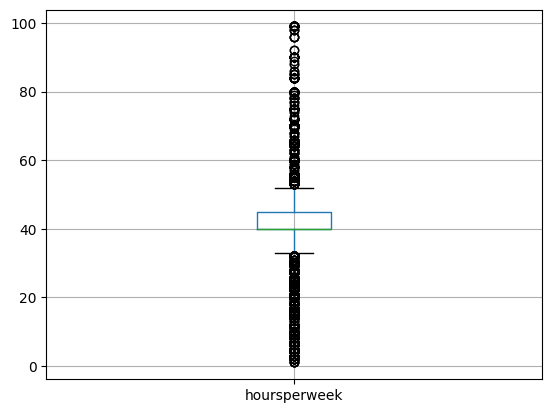

In [50]:
df.boxplot('hoursperweek')

#here it is confirm that there are lot of outliers are there in the data

# Check the distribution of the variable

array([[<Axes: title={'center': 'age'}>]], dtype=object)

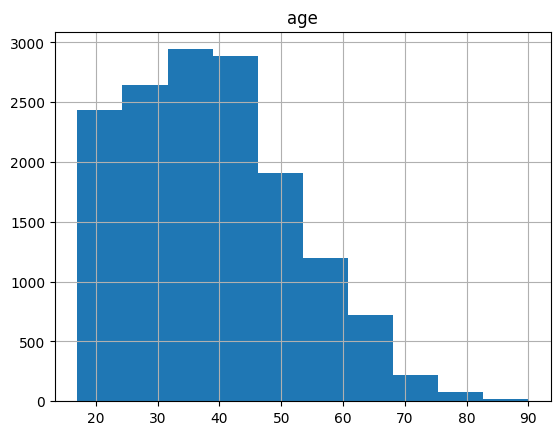

In [51]:
df.hist('age')

array([[<Axes: title={'center': 'capitalloss'}>]], dtype=object)

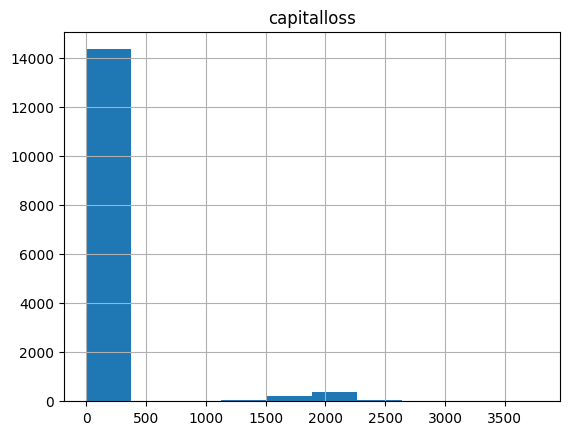

In [52]:
df.hist('capitalloss')

array([[<Axes: title={'center': 'capitalgain'}>]], dtype=object)

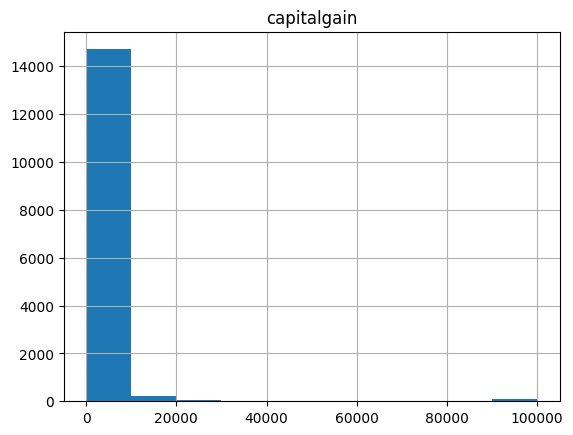

In [53]:
df.hist('capitalgain')

array([[<Axes: title={'center': 'hoursperweek'}>]], dtype=object)

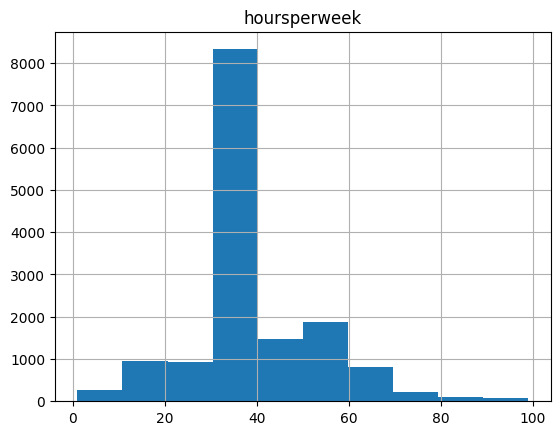

In [54]:
df.hist('hoursperweek')

array([[<Axes: title={'center': 'educationno'}>]], dtype=object)

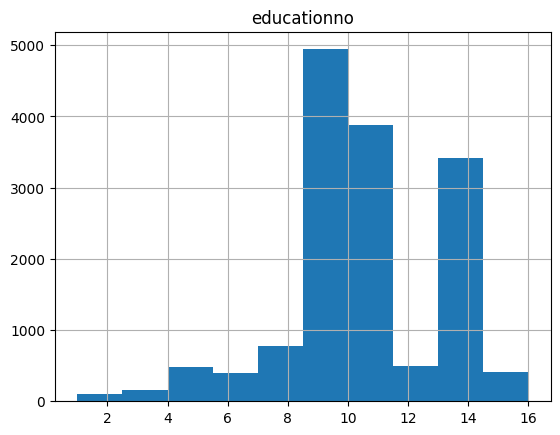

In [55]:
df.hist('educationno')

#It is clear that all the 5 variables are skewed, so the data is continuous

# Split the data into separate training and test set

In [56]:
X= df.drop(['Salary'],axis=1)
y=df['Salary']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)

In [59]:
X_train, X_test, y_train, y_test= train_test_split(X_encoded,y,test_size=0.2, random_state=0)

In [60]:
X_train.shape, X_test.shape

((12048, 13), (3012, 13))

# Feature Scaling

In [61]:
col= X_train.columns

In [62]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming cols contain the list of numerical column names
numerical_cols = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]

# Separate numerical and categorical columns
X_train_numerical = X_train[numerical_cols]
X_test_numerical = X_test[numerical_cols]
X_train_categorical = X_train.drop(columns=numerical_cols)
X_test_categorical = X_test.drop(columns=numerical_cols)

# Apply StandardScaler to numerical columns
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_numerical), columns=numerical_cols)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_numerical), columns=numerical_cols)

# Combine scaled numerical columns with categorical columns
X_train_final = pd.concat([X_train_scaled, X_train_categorical], axis=1)
X_test_final = pd.concat([X_test_scaled, X_test_categorical], axis=1)

In [63]:
X_train_final.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass,education,maritalstatus,occupation,relationship,race,sex,native
count,1.204800e+04,1.204800e+04,1.204800e+04,1.204800e+04,1.204800e+04,12048.000000,12048.000000,12048.000000,12048.000000,12048.000000,12048.000000,12048.000000,12048.000000
mean,-4.482175e-17,-2.538916e-16,4.718079e-18,-4.305247e-17,-1.592352e-17,2.214890,10.269007,2.600598,6.017098,1.410027,3.681607,0.673058,35.477839
std,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,0.968099,3.827864,1.505422,4.031589,1.592568,0.829473,0.469115,5.855968
min,-1.622692e+00,-3.571262e+00,-2.799319e-01,-2.031960e-01,-3.361554e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.017977e-01,-4.337572e-01,-2.799319e-01,-2.031960e-01,-7.288828e-02,2.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,37.000000
50%,-1.301570e-01,-4.156907e-02,-2.799319e-01,-2.031960e-01,-7.288828e-02,2.000000,11.000000,2.000000,6.000000,1.000000,4.000000,1.000000,37.000000
75%,6.907371e-01,1.134995e+00,-2.799319e-01,-2.031960e-01,3.487355e-01,2.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,37.000000
max,3.750434e+00,2.311559e+00,4.750729e+00,8.460696e+00,4.059025e+00,6.000000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,39.000000


In [64]:
y_train.head()

13607     <=50K
5855       >50K
14692     <=50K
5068      <=50K
2180      <=50K
Name: Salary, dtype: object

In [65]:
from sklearn. preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [66]:
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)
svc=SVC() 
svc.fit(X_train,y_train)
# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with default hyperparameters: 0.8008


# Run SVM with different hyperparameters

# Run svm with rbf kernel and C=100

In [67]:
svc= SVC(C=100.0)
svc.fit(X_train, y_train)
y_pred= svc.predict(X_test)
print('Mode accuracy score with rbf kernel and C=100.0 : {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

Mode accuracy score with rbf kernel and C=100.0 : 0.8260


#svm with rbf kernel and c =1000

In [68]:
svc= SVC(C=1000.0)
svc.fit(X_train, y_train)
y_pred= svc.predict(X_test)
print('Mode accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

Mode accuracy score with rbf kernel and C=1000.0 : 0.8413


# Run Svm with linear kernel

#Run svm with linear kenel and c=1

In [69]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1.0 : 0.8001


#Run svm with linear kernel and c=100

In [70]:
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with sigmoid kernel and C=1.0 : 0.7424


# check for overfitting and underfitting

In [71]:
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.8030
Test set score: 0.8001


# Convolution Matrix

In [73]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1882  367]
 [ 409  354]]

True Positives(TP) =  1882

True Negatives(TN) =  354

False Positives(FP) =  367

False Negatives(FN) =  409


<Axes: >

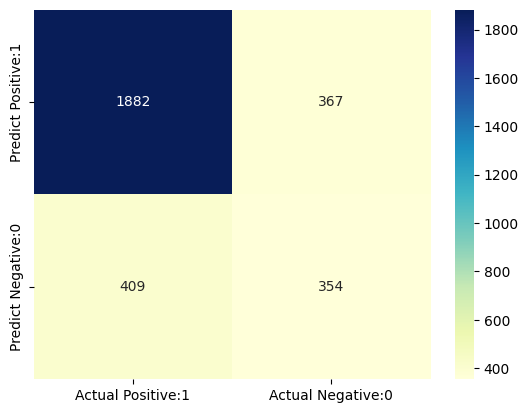

In [74]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classification Matrix

In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.82      0.84      0.83      2249
        >50K       0.49      0.46      0.48       763

    accuracy                           0.74      3012
   macro avg       0.66      0.65      0.65      3012
weighted avg       0.74      0.74      0.74      3012



In [77]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [78]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7424


In [79]:

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2576


In [80]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8215


In [81]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8215


In [82]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.5090


In [83]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.4910


# ROC - AUC

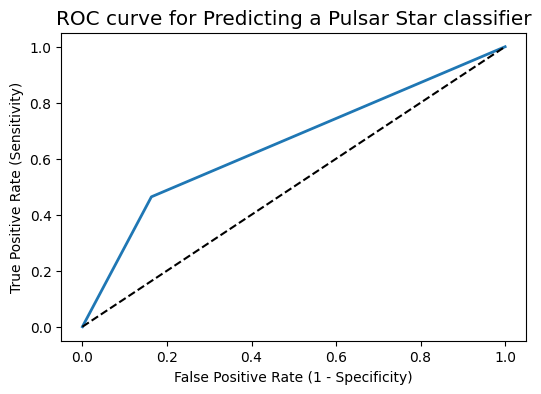

In [86]:
from sklearn.metrics import roc_curve
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)
y_pred_binary = label_encoder.transform(y_pred)

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# Q1:2

In [87]:
data= 'SalaryData_Train(1).csv'
df1= pd.read_csv(data)

In [88]:
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [94]:
df1.shape

(30161, 14)

In [93]:
col_names = df1.columns

col_names

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [95]:
df1['Salary'].value_counts()

Salary
 <=50K    22653
 >50K      7508
Name: count, dtype: int64

In [97]:
df1.info

<bound method DataFrame.info of        age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58            Private      HS-grad            9              Widowed   
30159   22            Private      HS-grad            9        Never-married   
30160   52       Self-emp-inc      HS-grad            9   Married-civ-spouse   

       

In [99]:
df1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

# Outliers in data

In [100]:
df1.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


Text(0, 0.5, 'educationno')

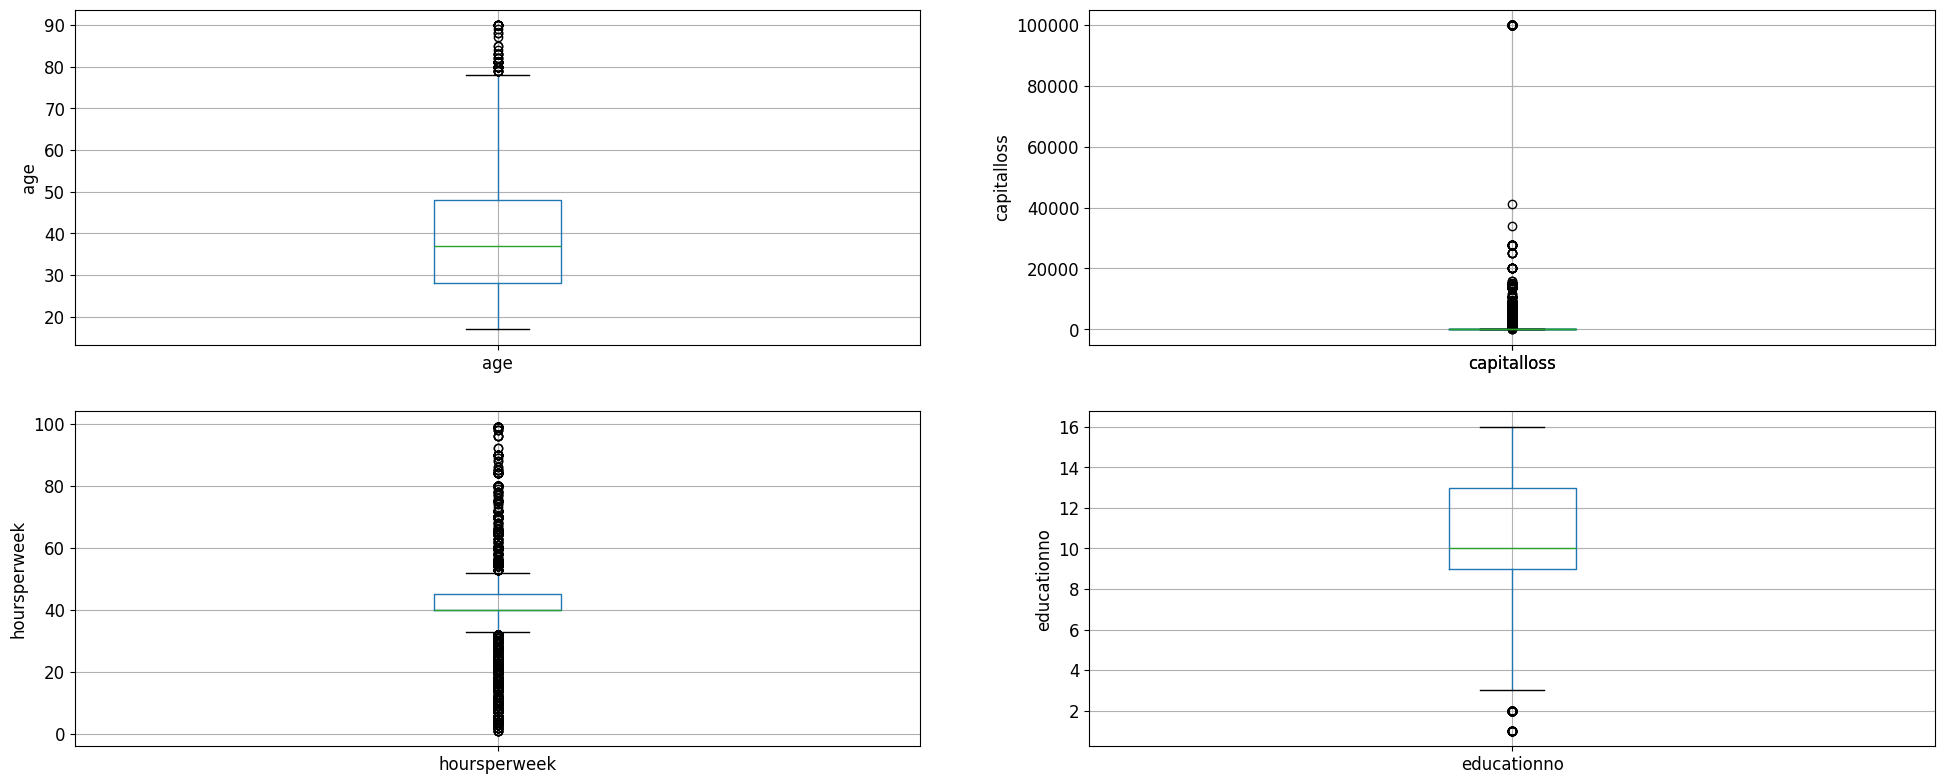

In [108]:
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='age')
fig.set_title('')
fig.set_ylabel('age')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='capitalgain')
fig.set_title('')
fig.set_ylabel('capitalgain')
plt.subplot(4, 2, 2)
fig = df.boxplot(column='capitalloss')
fig.set_title('')
fig.set_ylabel('capitalloss')
plt.subplot(4, 2, 3)
fig = df.boxplot(column='hoursperweek')
fig.set_title('')
fig.set_ylabel('hoursperweek')
plt.subplot(4, 2, 4)
fig = df.boxplot(column='educationno')
fig.set_title('')
fig.set_ylabel('educationno')





outliers are present throughout the data

# Checking the distribution of the variable

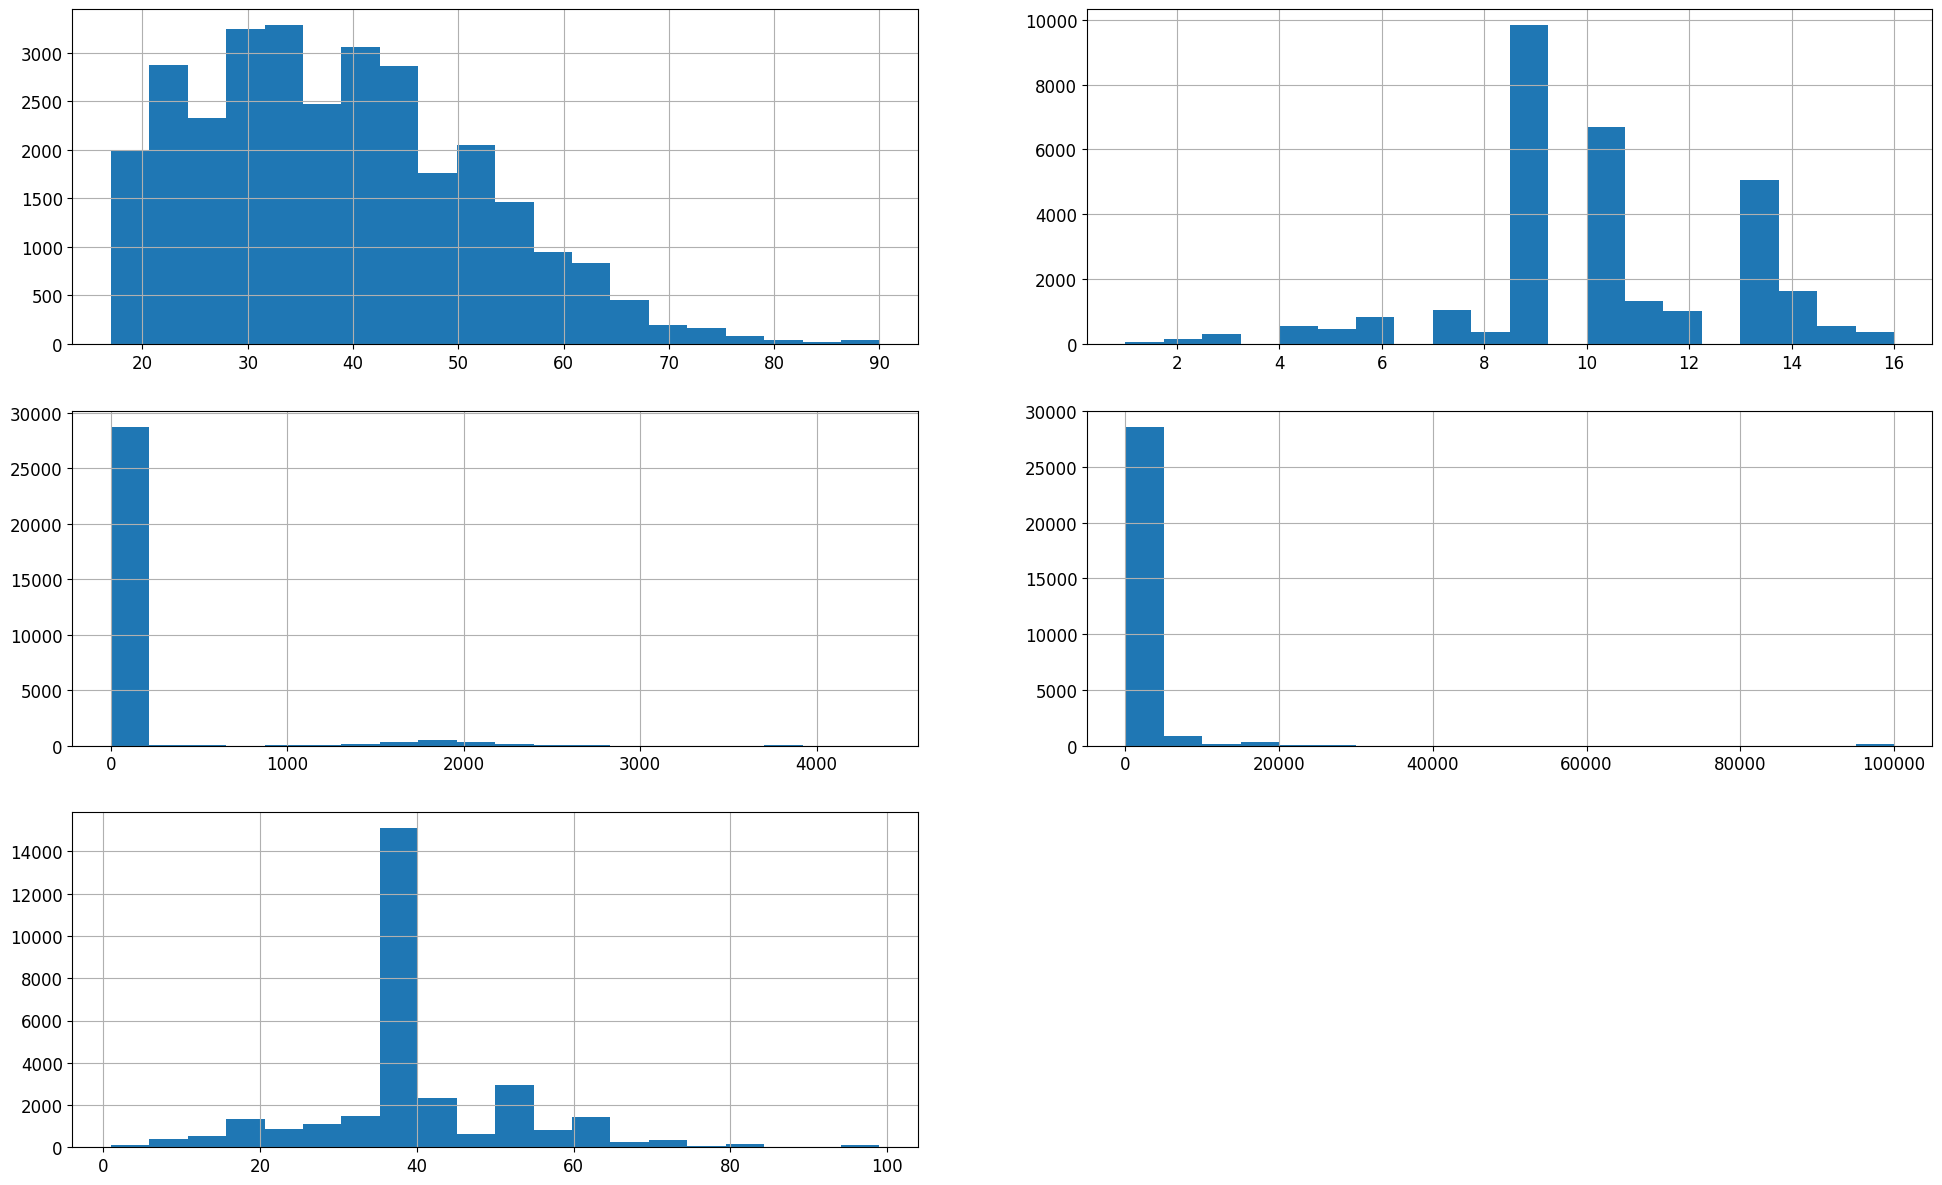

In [110]:
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df1['age'].hist(bins=20)

plt.subplot(4, 2, 2)
fig = df1['educationno'].hist(bins=20)
plt.subplot(4, 2, 3)
fig = df1['capitalloss'].hist(bins=20)
plt.subplot(4, 2, 4)
fig = df1['capitalgain'].hist(bins=20)
plt.subplot(4,2,5)
fiq= df1['hoursperweek'].hist(bins=20)










# Declare feature vector and target variable

In [112]:
X = df1.drop(['Salary'], axis=1)

y = df1['Salary']

In [113]:
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 0)

In [115]:
X_train.shape, X_test.shape
((14318, 8), (3580, 8))

((14318, 8), (3580, 8))

# Feature Scaling

In [117]:
X_train.shape, X_test.shape


((24128, 13), (6033, 13))

In [118]:
cols = X_train.columns
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
count,2.412800e+04,2.412800e+04,2.412800e+04,2.412800e+04,2.412800e+04,2.412800e+04,2.412800e+04,2.412800e+04,2.412800e+04,2.412800e+04,2.412800e+04,2.412800e+04,2.412800e+04
mean,1.213294e-16,2.055532e-16,-9.070257e-17,-1.339924e-16,4.888515e-17,-4.240640e-17,-3.681111e-17,7.715608e-17,1.225074e-16,-4.770720e-17,3.430795e-17,-1.236853e-17,-3.012621e-16
std,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00
min,-1.634742e+00,-2.310891e+00,-2.716983e+00,-3.570420e+00,-1.719895e+00,-1.478700e+00,-8.870494e-01,-4.397344e+00,-1.438381e+00,-2.831407e-01,-2.086117e-01,-3.408630e+00,-5.989622e+00
25%,-7.956450e-01,-2.065686e-01,-3.514830e-01,-4.406437e-01,-3.854590e-01,-9.826514e-01,-8.870494e-01,3.857197e-01,-1.438381e+00,-2.831407e-01,-2.086117e-01,-7.874657e-02,2.656802e-01
50%,-1.091110e-01,-2.065686e-01,1.741838e-01,-4.942162e-02,-3.854590e-01,9.446890e-03,-2.636992e-01,3.857197e-01,6.952262e-01,-2.831407e-01,-2.086117e-01,-7.874657e-02,2.656802e-01
75%,6.537046e-01,-2.065686e-01,4.370171e-01,1.124245e+00,9.489774e-01,7.535206e-01,9.830011e-01,3.857197e-01,6.952262e-01,-2.831407e-01,-2.086117e-01,3.481616e-01,2.656802e-01
max,3.781249e+00,4.002076e+00,1.225517e+00,2.297911e+00,2.283414e+00,1.745619e+00,2.229701e+00,3.857197e-01,6.952262e-01,4.707428e+00,8.452299e+00,4.531861e+00,6.038046e-01


In [119]:
vc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8321


In [120]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

c:\Users\sandr\OneDrive\Documents\ws\ml_models\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [121]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7499


In [122]:
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

c:\Users\sandr\OneDrive\Documents\ws\ml_models\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Training set score: 0.7499


c:\Users\sandr\OneDrive\Documents\ws\ml_models\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Test set score: 0.7557


In [208]:
linear_svc=SVC(kernel='linear', C=1.0) 
linear_svc.fit(X_train,y_train)
# make predictions on test set
y_pred_test=linear_svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9615


In [206]:
poly_svc=SVC(kernel='poly', C=1.0) 
poly_svc.fit(X_train,y_train)
y_pred=poly_svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.8846


In [207]:
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 
sigmoid_svc.fit(X_train,y_train)
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.9423


# Confusion matrix

In [124]:
m = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1882  367]
 [ 409  354]]

True Positives(TP) =  1882

True Negatives(TN) =  354

False Positives(FP) =  367

False Negatives(FN) =  409


<Axes: >

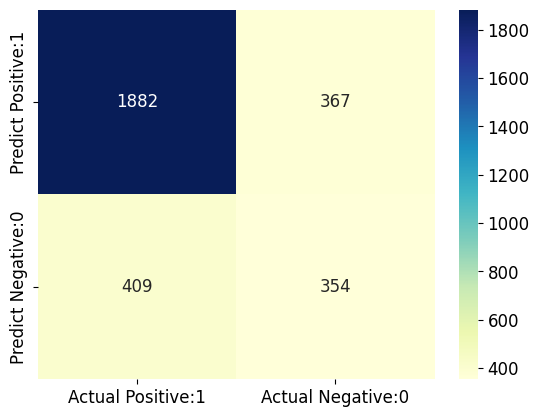

In [125]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [127]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89      4559
        >50K       0.67      0.61      0.64      1474

    accuracy                           0.83      6033
   macro avg       0.77      0.76      0.77      6033
weighted avg       0.83      0.83      0.83      6033



In [128]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [129]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7424


In [130]:
lassification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2576


In [131]:
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8368


In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

In [132]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8215


In [133]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.5090


In [134]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.4910


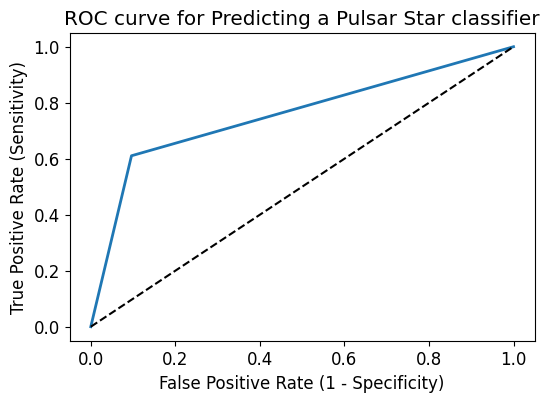

In [136]:
from sklearn.metrics import roc_curve
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)
y_pred_binary = label_encoder.transform(y_pred)


fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# Q2

In [137]:
data= 'forestfires.csv'
df2= pd.read_csv(data)

In [138]:
df2.shape

(517, 31)

In [139]:
df2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [178]:
col_names= df2.columns
col_names

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [140]:
df2.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [142]:
df2['size_category'].value_counts()

size_category
small    378
large    139
Name: count, dtype: int64

In [143]:
df2.info

<bound method DataFrame.info of     month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0

In [144]:
df2.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [145]:
df2.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'rain')

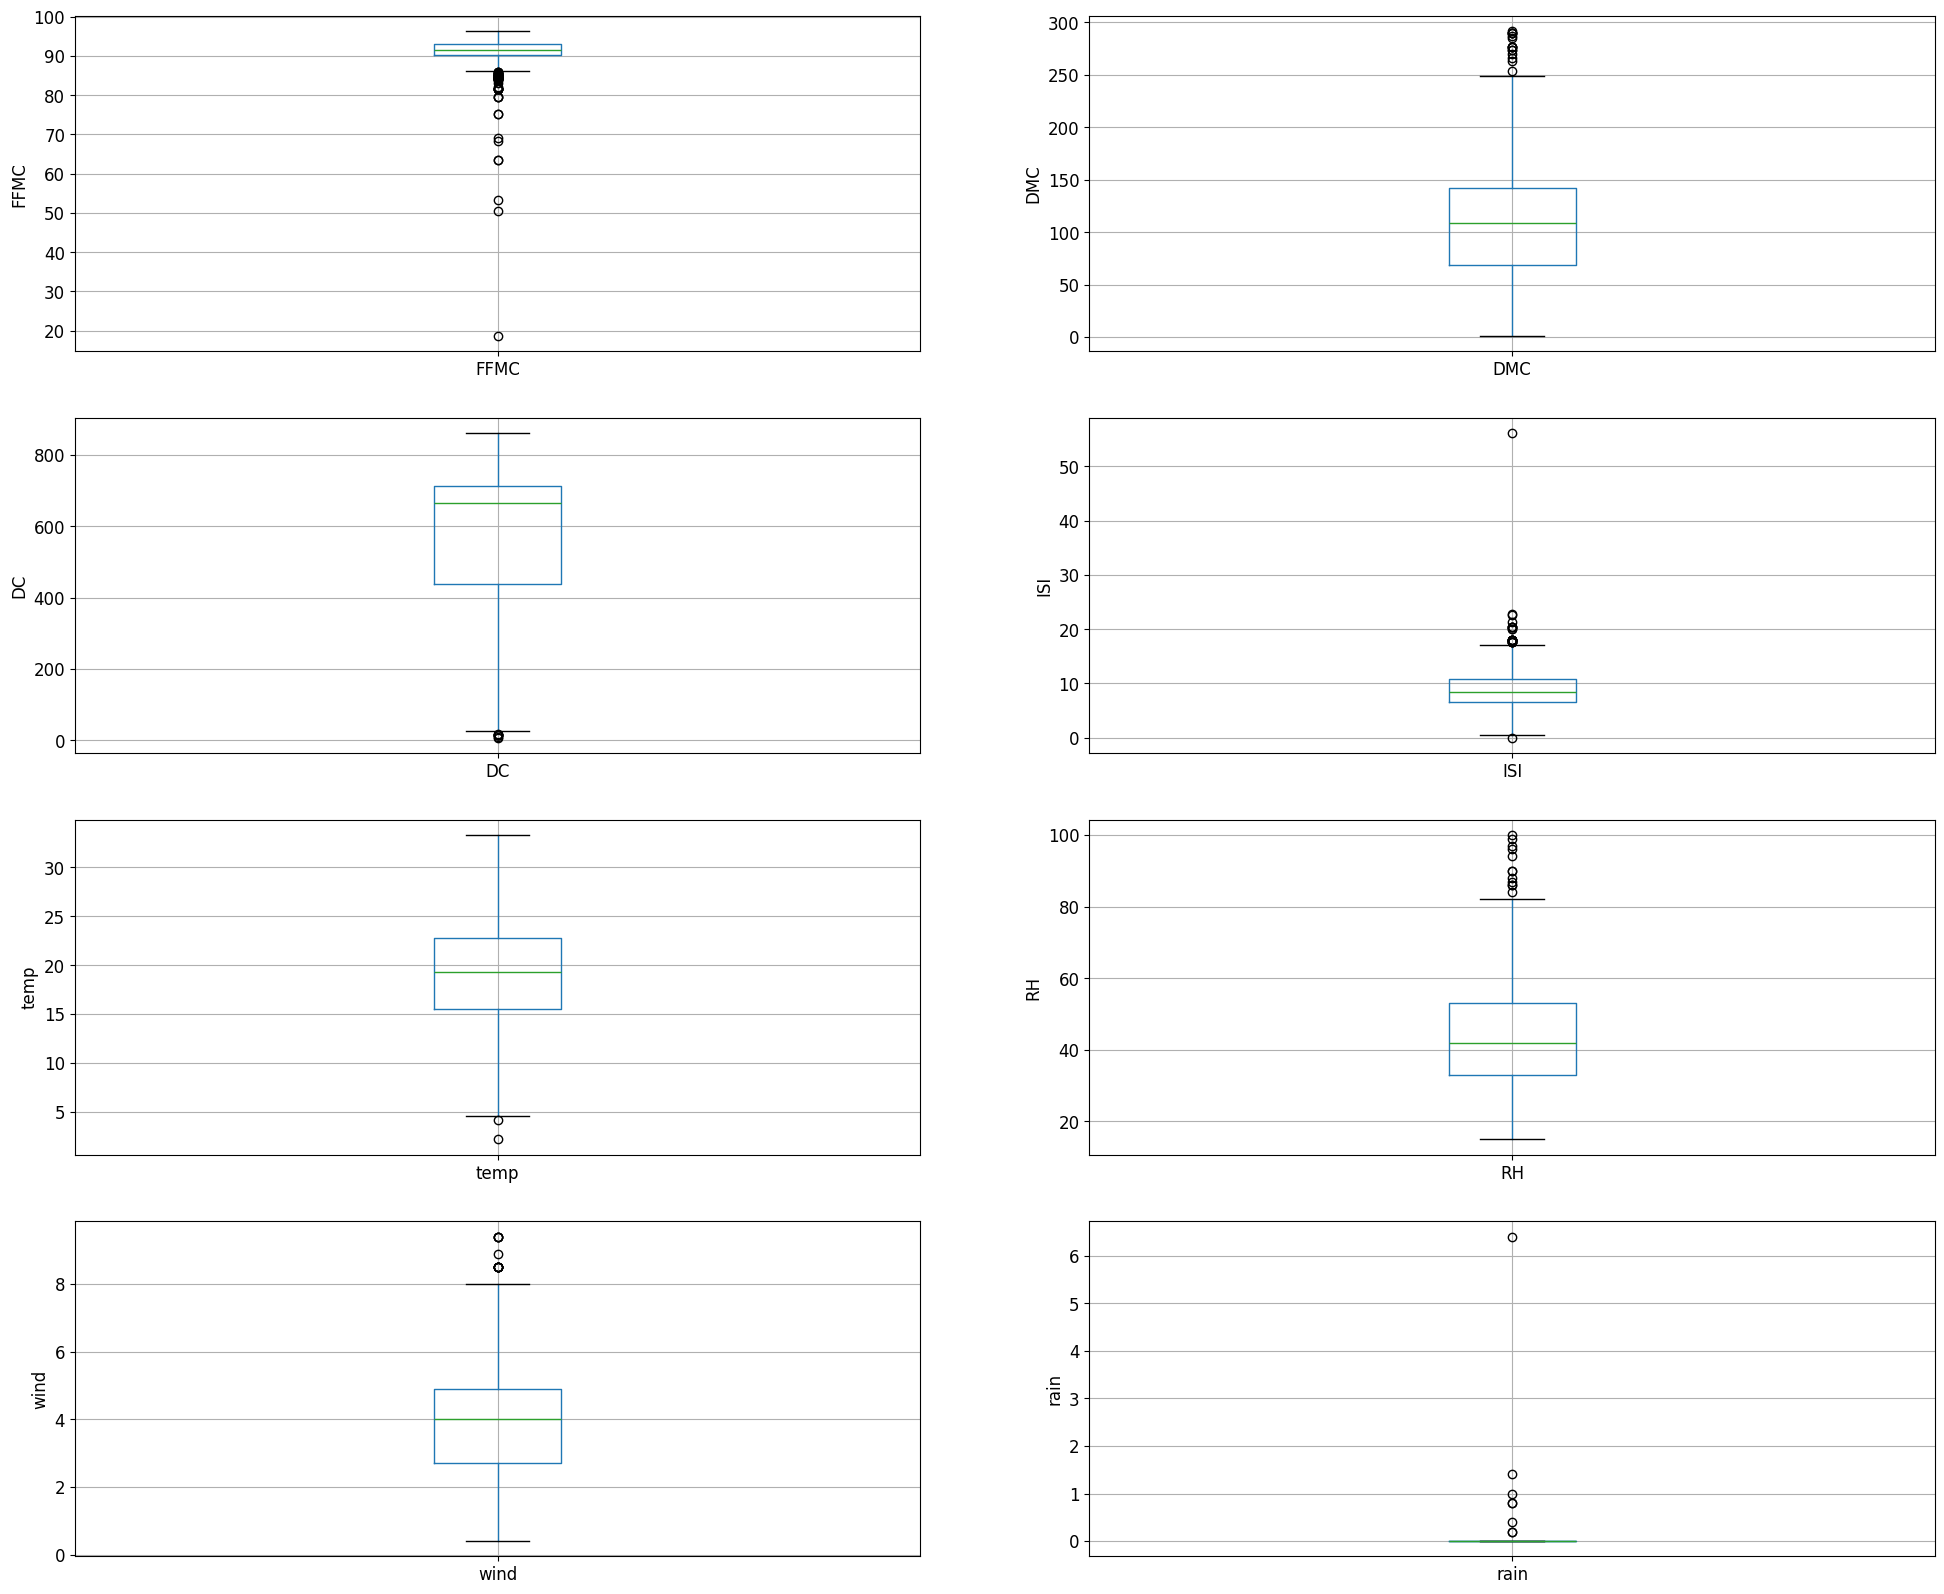

In [157]:

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df2.boxplot(column='FFMC')
fig.set_ylabel('FFMC')

plt.subplot(4, 2, 2)
fig = df2.boxplot(column='DMC')
fig.set_title('')
fig.set_ylabel('DMC')
plt.subplot(4, 2, 3)
fig = df2.boxplot(column='DC')
fig.set_title('')
fig.set_ylabel('DC')
plt.subplot(4, 2, 4)
fig = df2.boxplot(column='ISI')
fig.set_title('')
fig.set_ylabel('ISI')


plt.subplot(4, 2, 5)
fig = df2.boxplot(column='temp')
fig.set_title('')
fig.set_ylabel('temp')




plt.subplot(4, 2, 6)
fig = df2.boxplot(column='RH')
fig.set_title('')
fig.set_ylabel('RH')

plt.subplot(4, 2, 7)
fig = df2.boxplot(column='wind')
fig.set_title('')
fig.set_ylabel('wind')

plt.subplot(4, 2, 8)
fig = df2.boxplot(column='rain')
fig.set_title('')
fig.set_ylabel('rain')






















Text(0, 0.5, 'monthjun')

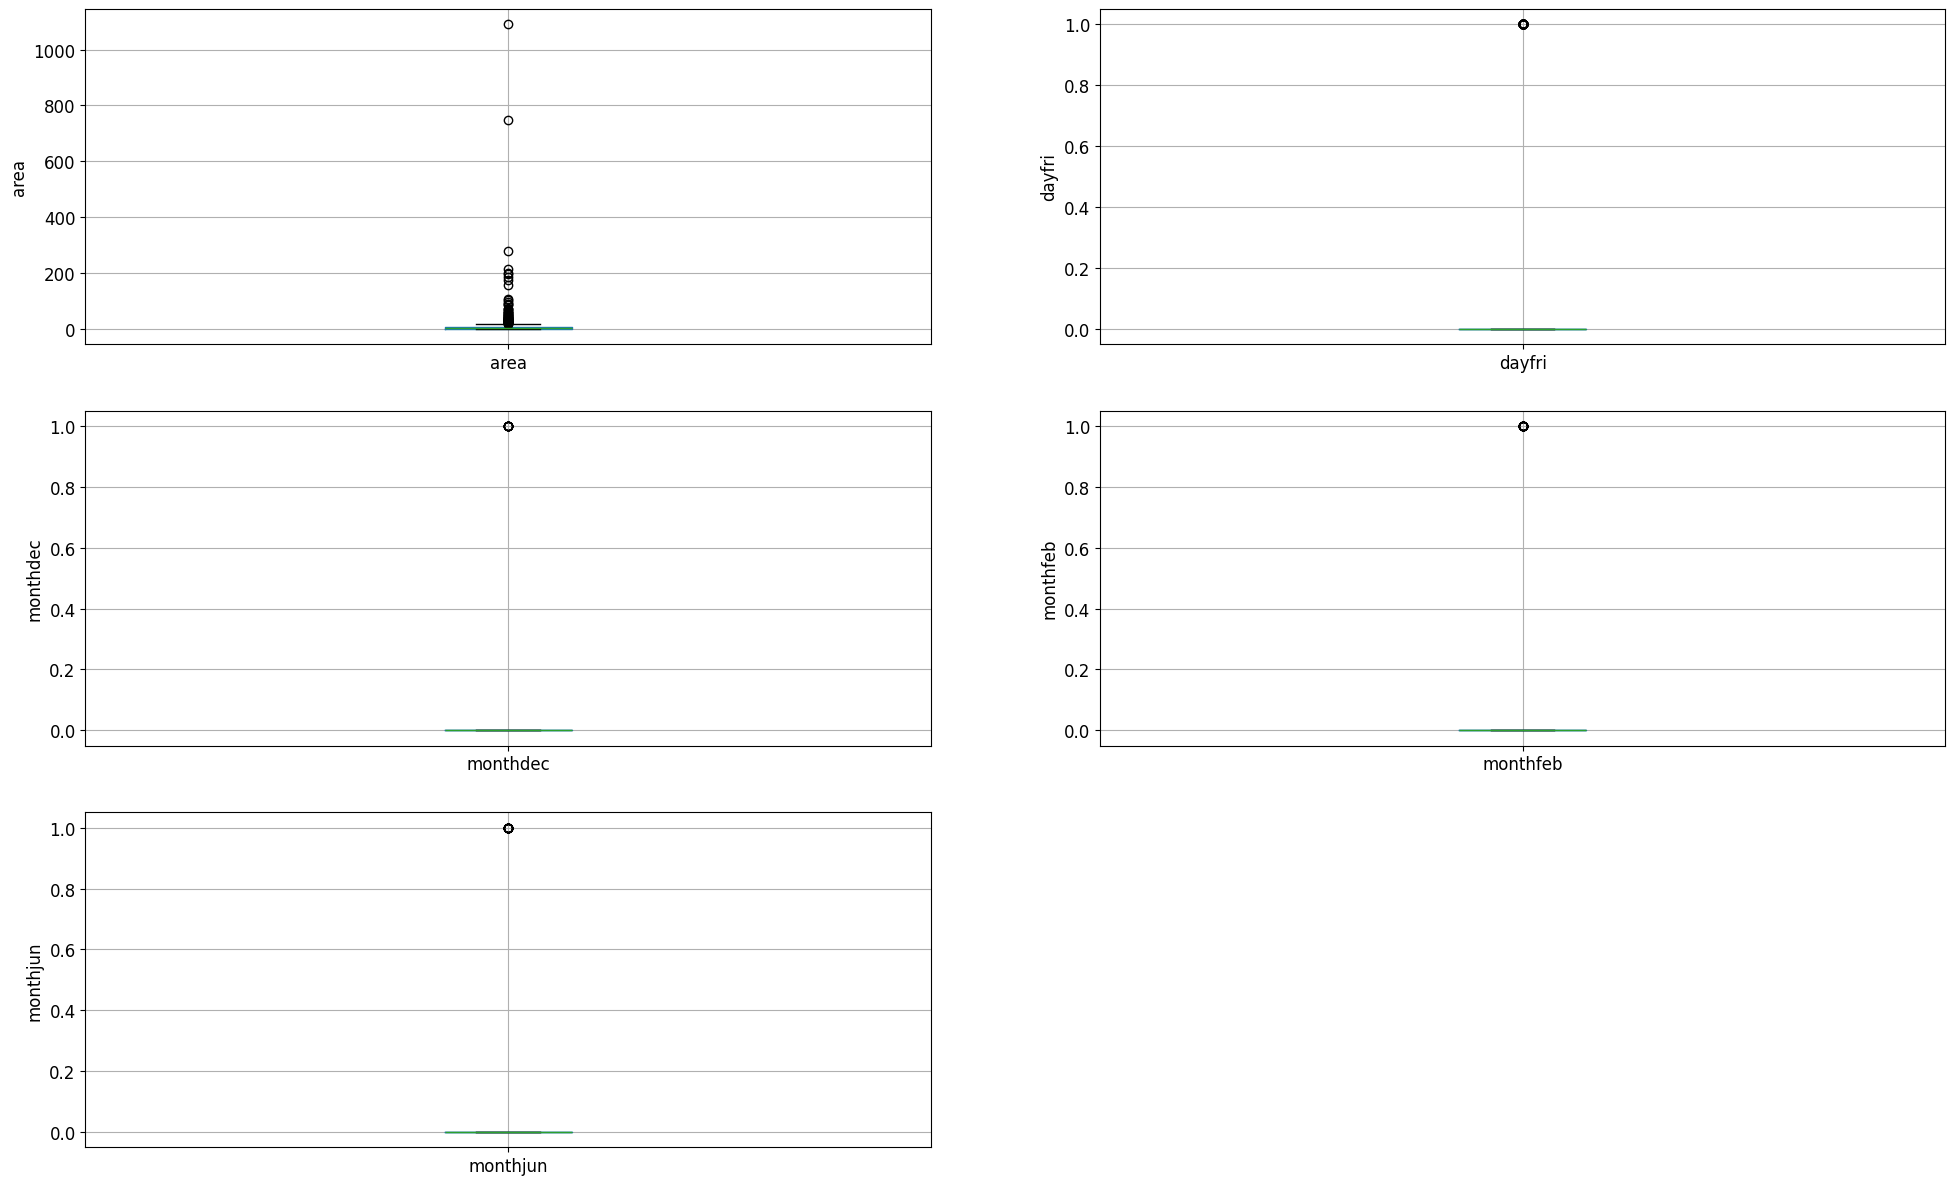

In [158]:
plt.figure(figsize=(24,20))
plt.subplot(4, 2, 1)
fig = df2.boxplot(column='area')
fig.set_title('')
fig.set_ylabel('area')
plt.subplot(4, 2, 2)
fig = df2.boxplot(column='dayfri')
fig.set_title('')
fig.set_ylabel('dayfri')

plt.subplot(4, 2,3)
fig = df2.boxplot(column='monthdec')
fig.set_title('')
fig.set_ylabel('monthdec')
plt.subplot(4, 2, 4)
fig = df2.boxplot(column='monthfeb')
fig.set_title('')
fig.set_ylabel('monthfeb')


plt.subplot(4, 2, 5)
fig = df2.boxplot(column='monthjun')
fig.set_title('')
fig.set_ylabel('monthjun')


Text(0, 0.5, 'monthmay')

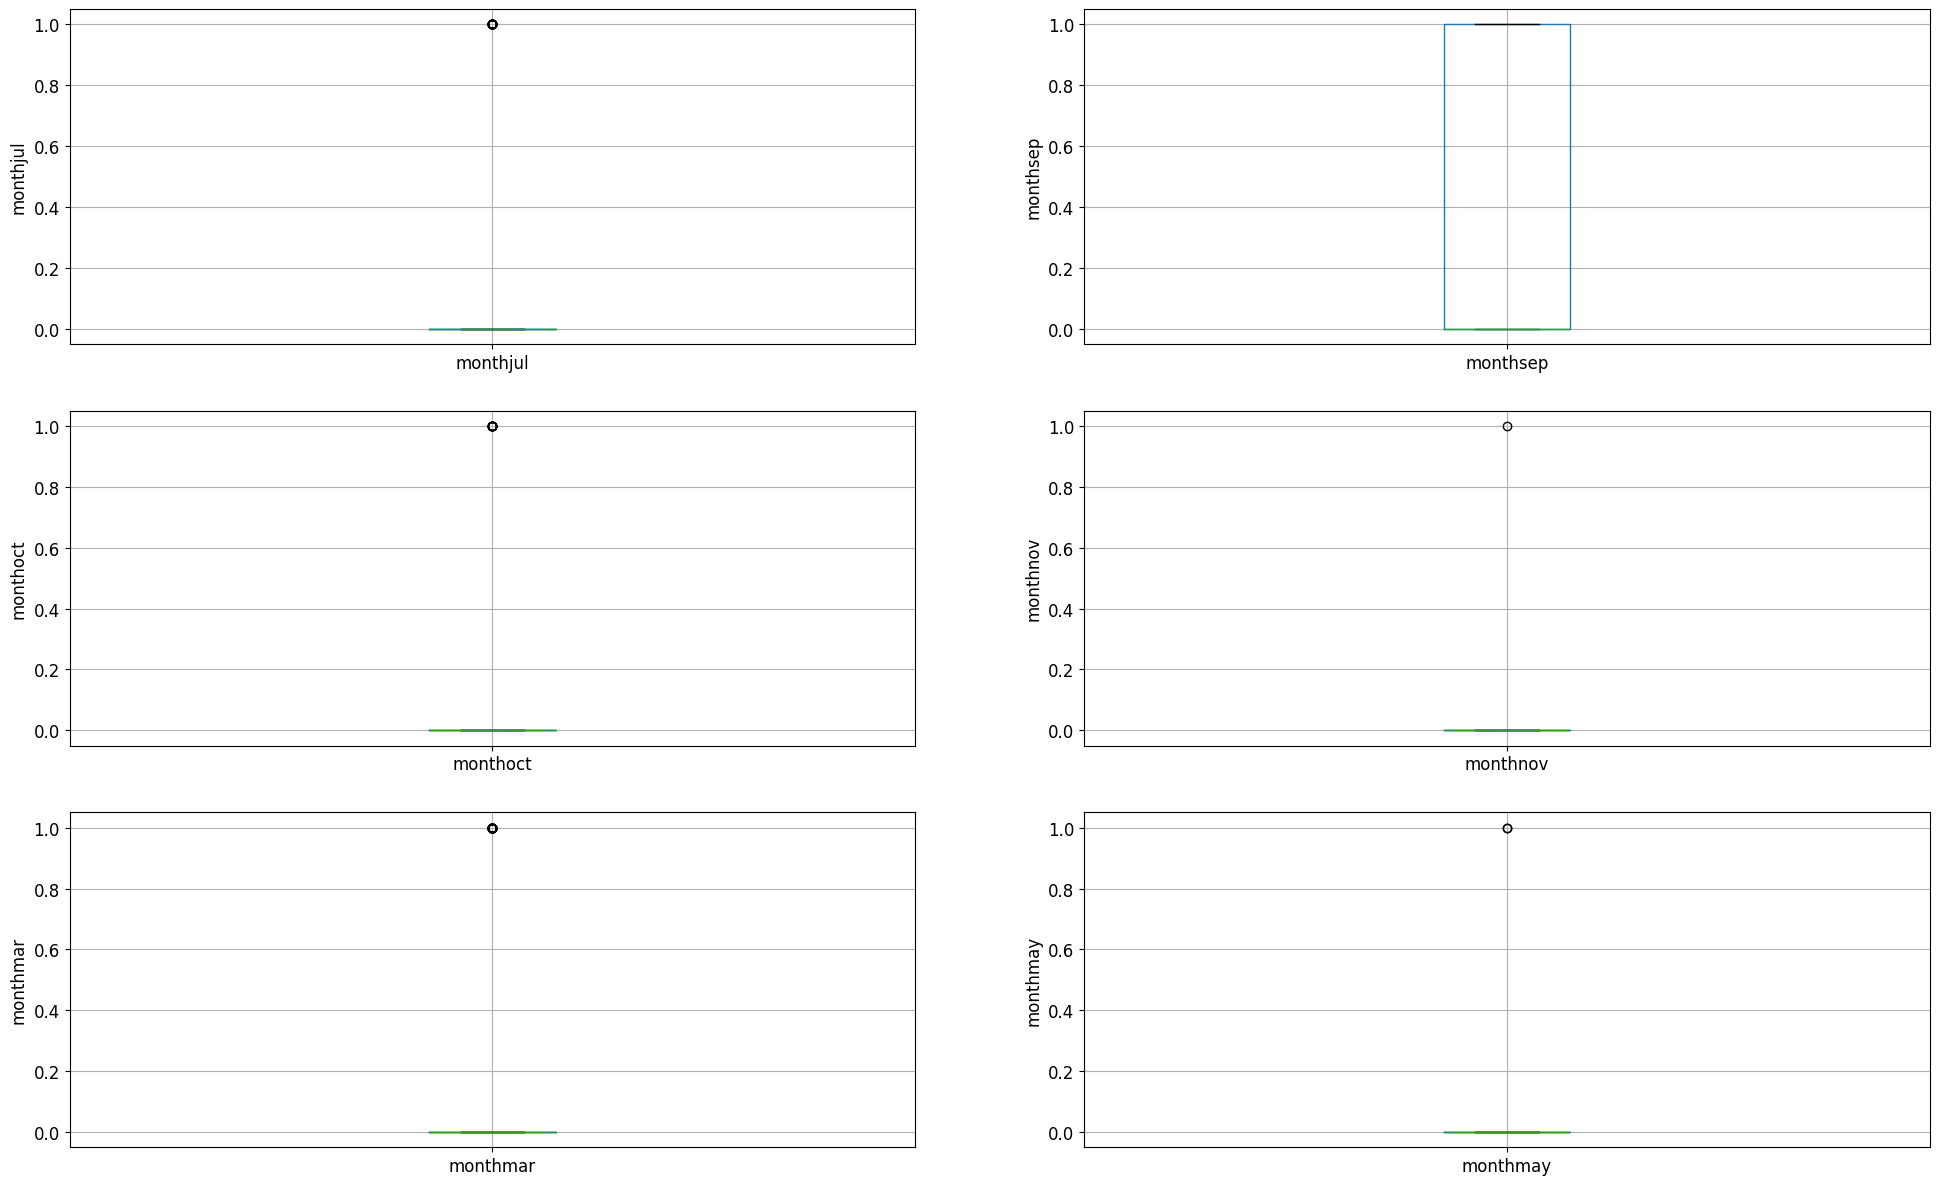

In [159]:
plt.figure(figsize=(24,20))
plt.subplot(4, 2, 1)
fig = df2.boxplot(column='monthjul')
fig.set_title('')
fig.set_ylabel('monthjul')
plt.subplot(4, 2, 2)
fig = df2.boxplot(column='monthsep')
fig.set_title('')
fig.set_ylabel('monthsep')
plt.subplot(4, 2, 3)
fig = df2.boxplot(column='monthoct')
fig.set_title('')
fig.set_ylabel('monthoct')
plt.subplot(4, 2, 4)
fig = df2.boxplot(column='monthnov')
fig.set_title('')
fig.set_ylabel('monthnov')
plt.subplot(4, 2, 5)
fig = df2.boxplot(column='monthmar')
fig.set_title('')
fig.set_ylabel('monthmar')

plt.subplot(4, 2, 6)
fig = df2.boxplot(column='monthmay')
fig.set_title('')
fig.set_ylabel('monthmay')


<Figure size 2400x2000 with 0 Axes>

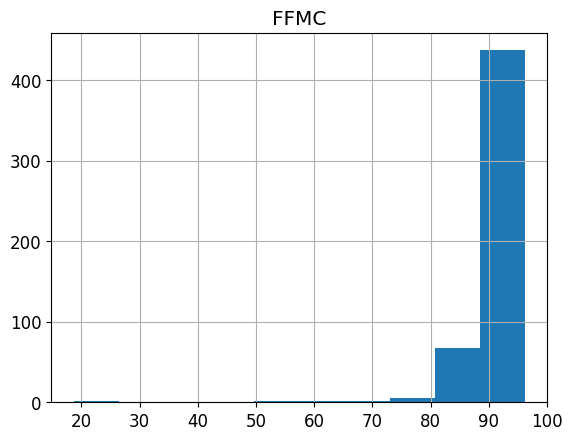

In [169]:
plt.figure(figsize=(24,20))
fig = df2.hist(column='FFMC')








In [171]:
X = df2.drop(['size_category'], axis=1)

y = df2['size_category']

In [172]:
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 0)

In [174]:
X_train.shape, X_test.shape

((413, 30), (104, 30))

In [179]:
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9231


In [185]:
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9615


In [186]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array(['large', 'small', 'large', 'small', 'large', 'small', 'small',
       'small', 'small', 'small', 'large', 'large', 'large', 'small',
       'small', 'small', 'small', 'small', 'large', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'large', 'large', 'small', 'small', 'small', 'small', 'large',
       'large', 'small', 'large', 'small', 'small', 'small', 'large',
       'small', 'large', 'large', 'large', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'small', 'small', 'large',
       'small', 'small', 'small', 'large', 'small', 'large', 'small',
       'small', 'small', 'small', 'large', 'large', 'small', 'small',
       'large', 'small', 'small', 'large', 'small', 'small', 'small',
       'large', 'small', 'large', 'small', 'small', 'small', 'small',
       'small', 'large', 'large', 'small', 'large', 'small', 'small',
       'large', 'sma

In [187]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9952


In [188]:
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9952
Test set score: 0.9615


In [189]:
y_test.value_counts()

size_category
small    74
large    30
Name: count, dtype: int64

In [190]:

null_accuracy = (3306/(3306+274))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9235


In [191]:
poly_svc=SVC(kernel='poly', C=1.0) 

poly_svc.fit(X_train,y_train)

y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.8846


In [192]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 
sigmoid_svc.fit(X_train,y_train)
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.9423


# Confusion matrix

In [193]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[29  1]
 [ 3 71]]

True Positives(TP) =  29

True Negatives(TN) =  71

False Positives(FP) =  1

False Negatives(FN) =  3


<Axes: >

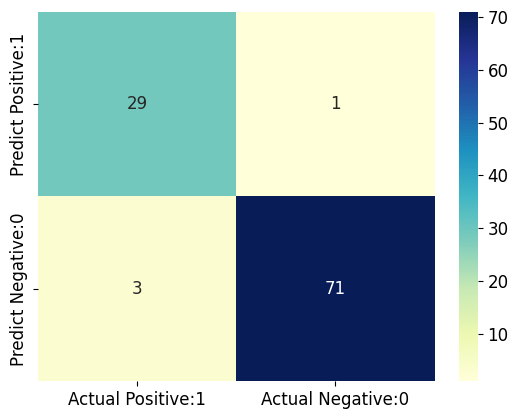

In [194]:

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [195]:

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       large       0.91      0.97      0.94        30
       small       0.99      0.96      0.97        74

    accuracy                           0.96       104
   macro avg       0.95      0.96      0.95       104
weighted avg       0.96      0.96      0.96       104



In [196]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [197]:
lassification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7424


In [198]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0385


In [199]:
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9667


In [200]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9062


In [201]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9062


In [202]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0139


In [203]:
pecificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.4910


# ROC - AUC curve

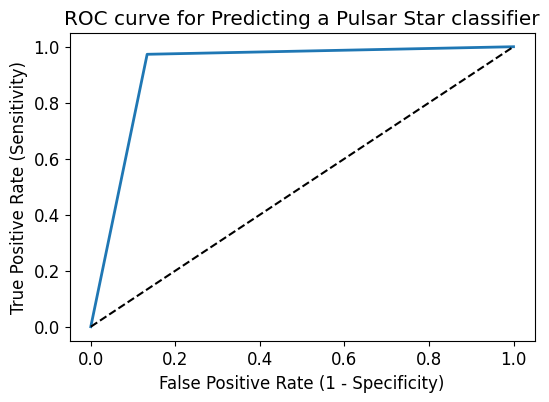

In [205]:
y_test_binary = label_encoder.fit_transform(y_test)
y_pred_binary = label_encoder.transform(y_pred)

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()